# <span style="color:#54B1FF">Clustering:</span> &nbsp; <span style="color:#1B3EA9"><b>K Means</b></span>

<br>

Similar to the previous chapter, where we used **K-Nearest Neighbors** as an example of a relatively simple classifier, we will use its cousin: the **K-Means Clustering** algorithm to demonstrate **unsupervised learning**.



<br>

___

First let's import the modules we'll need for this notebook.

<br>
<br>

In [1]:

import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans


<a name="toc"></a>
# Table of Contents

* [KMeans Clustering I: &nbsp; How it works](#kmeansI)
	* [One feature, two clusters](#kmeansI-1-2)
	* [One feature, three clusters](#kmeansI-1-3)
	* [One feature, four clusters](#kmeansI-1-4)
	* [Two features, two clusters](#kmeansI-2-2)
	* [Two features, three clusters](#kmeansI-2-3)
	* [Three features, two clusters](#kmeansI-3-2)


___

<a name="kmeansI"></a>
# K-Means Clustering I:  &nbsp; How it works
[Back to Table of Contents](#toc)
<br>

K-Means Clustering works by:

1. Setting the total of number of clusters, then
2. Assigning cluster labels to observations in a manner that minimizes the distances between within-cluster observations.

<br>

⚠️ A **label** is an integer specificying the cluster to which a particular observation belongs.


<br>

The remainder of this section considers examples involving various numbers of features (1, 2 or 3) and various numbers of clusters (1, 2, 3 or 4).

<br>
<br>

___

<a name="kmeansI-1-2"></a>
## One feature, two clusters
[Back to Table of Contents](#toc)
<br>

Let's start with a full example, then discuss the individual commands.

⚠️ You do not need to understand the deatils of the `plot_labeled_points` function below, so please ignore the code details unless you are interested. You only need to know (a) how to call this function, and (b) how to interpret the results.

<br>
<br>

In [2]:
def plot_labeled_points(x, labels, colors=None, ax=None, ms=12):
    x      = np.asarray(x)
    ax     = plt.gca() if (ax is None) else ax
    uy     = np.unique(labels)
    for yy,cc in zip(uy,colors):
        xx = x[labels==yy]
        if x.ndim==1:
            ax.plot( xx, np.zeros(xx.size), 'o', color=cc, ms=ms, label=f'Label = {yy}' )
        elif x.ndim==2:
            ax.plot( xx[:,0], xx[:,1], 'o', color=cc, ms=ms, label=f'Label = {yy}' )
    ax.axhline(0, color='k', ls=':')
    ax.legend()


Fitted cluster labels:  [0 0 0 0 0 1 1 1 1 1]


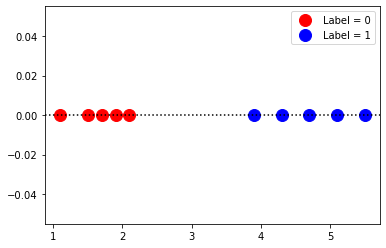

In [3]:
# FULL EXAMPLE

x      = np.array( [1.1, 2.1, 1.5, 1.9, 1.7,    4.3, 3.9, 5.1, 4.7, 5.5] )  #
X      = np.array([x]).T
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

labels = kmeans.labels_

print( f'Fitted cluster labels:  {labels}' )


plot_labeled_points(x, labels, colors=['r','b'])


<br>

The first command defines the features of a dataset with unknown labels:

<br>

In [4]:
x      = np.array( [1.1, 2.1, 1.5, 1.9, 1.7,    4.3, 3.9, 5.1, 4.7, 5.5] )

<br>

The second command ensures that the data are in the format (observations, features) as required by all machine learning algorithms in **sklearn**. Here there are 10 observations and 1 feature.

<br>

In [5]:
X      = np.array([x]).T

print(X.shape)

(10, 1)


<br>

The third command creates a K-Means clustering algorithm that will be ready to separate the data into two clusters. The random state (similar to **np.random.seed**) is also set.

<br>

In [6]:
kmeans = KMeans(n_clusters=2, random_state=0)

print(kmeans)

KMeans(n_clusters=2, random_state=0)


<br>

The next command fits the data.  This is the command that actually conducts the clustering.

<br>

In [7]:
kmeans.fit(X);

<br>

The next command retrieves the labels from the fitted data.

<br>

In [8]:
labels = kmeans.labels_

print(labels)

[0 0 0 0 0 1 1 1 1 1]


<br>
<br>

What happens if we change the number of clusters by setting `n_clusters=3` ?

<br>
<br>

Fitted cluster labels:  [0 0 0 0 0 2 2 1 1 1]


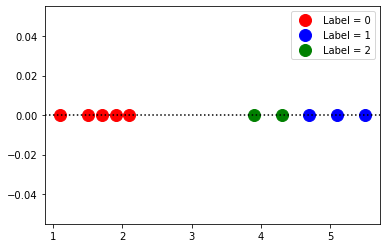

In [9]:
x      = np.array( [1.1, 2.1, 1.5, 1.9, 1.7,    4.3, 3.9, 5.1, 4.7, 5.5] )
X      = np.array([x]).T
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

labels = kmeans.labels_

print( f'Fitted cluster labels:  {labels}' )

plot_labeled_points(x, labels, colors=['r','b','g'])

The K-Means clustering algorithm has indeeed separated the data into distinct clusters, but two of the clusters are very close to one another.

So how do we determine whether 2 or 3 clusters is better?  A partial answer to this question is given in the next notebook.

The remainder of this notebook considers only how the K-Means algorithm applies to different numbers of features and clusters.

<br>
<br>
<br>

___

<a name="kmeansI-1-3"></a>
## One feature, three clusters
[Back to Table of Contents](#toc)
<br>

For this example, let's add a third cluster that is clearly separated from the other two clusters.

Note that the K-Means classifier is able to separate the clusters as we expect.

Also note that `plot_labeled_points` automatically handles more than two clusters.

<br>

Fitted cluster labels:  [0 0 0 0 0 2 2 2 2 1 1 1]


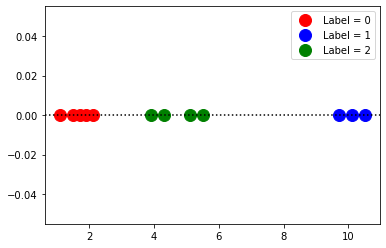

In [10]:

x      = np.array( [1.1, 2.1, 1.5, 1.9, 1.7,    4.3, 3.9, 5.1, 5.5,    10.5, 10.1, 9.7] )
X      = np.array([x]).T
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

labels = kmeans.labels_

print( f'Fitted cluster labels:  {labels}' )

plot_labeled_points(x, labels, colors=['r','b', 'g'])


<br>
<br>

___

<a name="kmeansI-1-4"></a>
## One feature, four clusters
[Back to Table of Contents](#toc)
<br>

Let's add yet another cluster just to check that everything works for four clusters.

<br>

Fitted cluster labels:  [3 3 3 3 3 1 1 1 1 2 2 2 0 0]


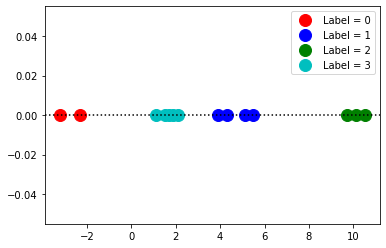

In [11]:

x      = np.array( [1.1, 2.1, 1.5, 1.9, 1.7,    4.3, 3.9, 5.1, 5.5,    10.5, 10.1, 9.7,   -3.2, -2.3] )
X      = np.array([x]).T
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

labels = kmeans.labels_

print( f'Fitted cluster labels:  {labels}' )

plot_labeled_points(x, labels, colors=['r','b', 'g', 'c'])


<br>
<br>

Excellent!  Let's move on to two features.

<br>
<br>
<br>

___

<a name="kmeansI-2-2"></a>
## Two features, two clusters
[Back to Table of Contents](#toc)
<br>

Like above, the data have to be assembled into a (observations, features) array, so to accommodate two features we must have two data columns.

Note that the `plot_labeled_points` function can handle both one- and two-feature observations.

<br>
<br>

Fitted cluster labels:  [1 1 1 0 0 0]


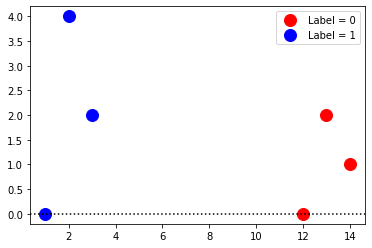

In [12]:

x = np.array([
    [1, 0],
    [2, 4],
    [3, 2],
    [12, 0],
    [13, 2],
    [14, 1],
])


kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(x)
labels = kmeans.labels_
print( f'Fitted cluster labels:  {labels}' )
plot_labeled_points(x, labels, colors=['r','b'])


<br>
<br>

___

<a name="kmeansI-2-3"></a>
## Two features, three clusters
[Back to Table of Contents](#toc)
<br>


Fitted cluster labels:  [2 2 2 0 0 0 1 1 1]


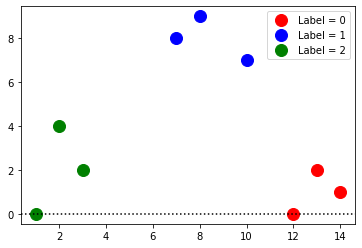

In [13]:

x = np.array([
    [1, 0],
    [2, 4],
    [3, 2],
    [12, 0],
    [13, 2],
    [14, 1],
    [7, 8],
    [10, 7],
    [8, 9],
])


kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(x)
labels = kmeans.labels_
print( f'Fitted cluster labels:  {labels}' )

plot_labeled_points(x, labels, colors=['r','b','g'])

___

<a name="kmeansI-3-2"></a>
## Three feature, two clusters
[Back to Table of Contents](#toc)
<br>


Fitted cluster labels:  [1 1 1 0 0 0]


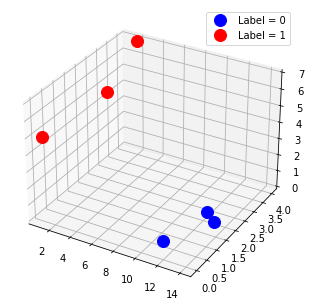

In [14]:

from mpl_toolkits import mplot3d

x = np.array([
    [1, 0, 5],
    [2, 4, 7],
    [3, 2, 6],
    [12, 0, 1],
    [13, 2, 0],
    [14, 1, 2],
])


kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(x)
labels = kmeans.labels_
print( f'Fitted cluster labels:  {labels}' )


fig    = plt.figure()
x0     = x[labels==0]
x1     = x[labels==1]
ax     = mplot3d.Axes3D(fig)
ax.plot( x0[:,0], x0[:,1], x0[:,2], 'o', color='b', ms=12, label='Label = 0' )
ax.plot( x1[:,0], x1[:,1], x1[:,2], 'o', color='r', ms=12, label='Label = 1' )
ax.legend()
plt.show()



<br>
<br>

Visualizing three features is difficult, and it is impossible to visualize more, so let's stop here!

<br>
<br>